In [1]:
from IPython.display import display , HTML
display(HTML("<style>.container {width:99% !importtant;}</style>"))

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'  
# No need to include %matplotlib inline magic command. These things come built-in now.

# Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn.datasets import load_digits , make_blobs
digits = load_digits()



import numpy as np  ; # np.linalg < linear algebra , numpy.linalg.cov
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
from scipy import stats , linalg ; # stats.skew stats.kurtosis
# skew does not have any unit
# kurtosis can have min value of 2 and max value of infinite.
# low kurtosis mean less data around the mean and more data inside tail.
#to reduce skew ness:
#Log transformation
#Square root transformation
#Power transformation
#Exponential transformation
#Box-Cox transformation, etc

from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
# cross_val_score(regression, X_train, y_train, cv=5, scoring='mean_squared_error')
# cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
# need to use stratify so that in train set all classes has equal rows.
#x_train , x_test , y_train , y_test = train_test_split(cf_min_max , cf.target , test_size=0.3 , stratify=cf.target ,random_state=0) 

# PreProcessing:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , PolynomialFeatures , LabelEncoder , OneHotEncoder


#MODELS
from sklearn.linear_model import LogisticRegression , LinearRegression , ridge_regression , SGDRegressor , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#neighbour
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBClassifier

#clustering:
from sklearn.cluster import KMeans , DBSCAN , MiniBatchKMeans
from sklearn.mixture import GaussianMixture


from sklearn.decomposition import PCA  # 1. Choose the model class
# model = PCA(n_components=2)      # 2. Instantiate the model with hyperparameters
# model.fit(X_iris)                # 3. Fit to data. Notice y is not specified!
# X_2D = model.transform(X_iris)   # 4. Transform the data to two dimensions




from sklearn.metrics import silhouette_score , classification_report , confusion_matrix , accuracy_score , f1_score , mean_squared_error
# metrics.confusion_matrix(y_test, predictions) , predictions is basically model.predict(x_test)
# accuracy_score is not much use in classifcation.
# f1_score is coorect indicator of good classifer. it is harmonic mean of precison and recall.
# accuracy_score(y_test, y_predict) ,  y_predict is model.predict(x_test)


#plotting
import seaborn as sns
import plotly.express as px
plt.style.use("seaborn")

#pipeline:
from sklearn.pipeline import Pipeline

import scipy.stats  ; # scipy.stats.norm.pdf(bins , mu , sigma )
from statsmodels.graphics.gofplots import qqplot

import joblib ; # to save ML model in disk

# score and accuracy




# PolynomialFeatures(degree=4)


#feature selection"
from sklearn.feature_selection import SelectKBest, f_classif , VarianceThreshold




# POLYNOMIAL REGRESSION

In [ ]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False)
>>> X_poly = poly_features.fit_transform(X)

# PIPELINE AND REGRESSION

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)


### MORE EXAMPLE:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

# Decision Trees

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

dot -Tpng iris_tree.dot -o iris_tree.png

# CONFUSION MATRIX CLASSIFICATION_REPORT

In [ ]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

## CORRELATION MATRIX WITH HEAT MAP

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
## basic thing you must need to do before you blidly throw your data to any model:
1. convert text to numberid : 

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

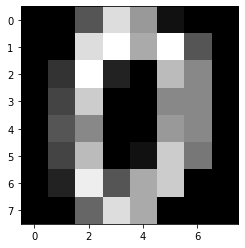

In [20]:
plt.imshow(digits.data[0].reshape(8,8) , cmap=plt.cm.gray)

In [41]:
df = pd.DataFrame(digits.data, columns= digits.feature_names)
df["target"]  = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


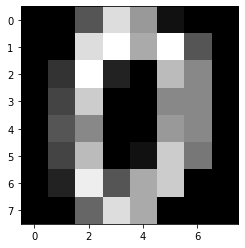

In [43]:
plt.imshow(df.iloc[0,:-1].values.reshape(8,8) , cmap=plt.cm.gray)


In [44]:
df.target.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [47]:
logisticRegr = LogisticRegression()


In [48]:
logisticRegr.fit(x_train, y_train)


C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
predictions = logisticRegr.predict(x_test)


In [50]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [52]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


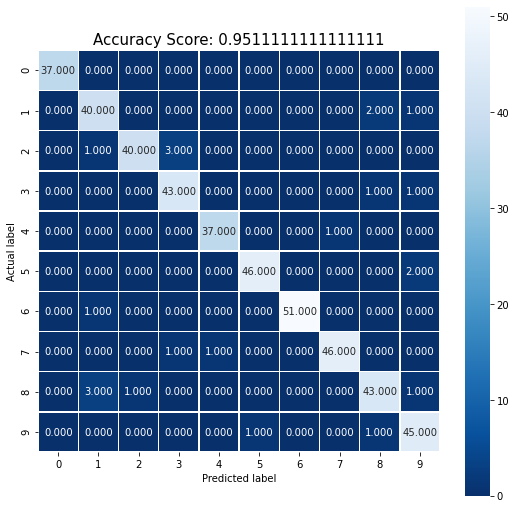

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [3]:
df=  sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df.tip.round(1).head()

0    1.0
1    1.7
2    3.5
3    3.3
4    3.6
Name: tip, dtype: float64

In [20]:
df.groupby(["sex","day"])["total_bill"].mean().unstack().round(2)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,18.71,19.86,20.80,21.89
Female,16.72,14.15,19.68,19.87


In [26]:
df.tip.quantile([.5, 0.75])

0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

In [80]:
px.histogram(df , "tip"  , facet_col="time" , barmode="group" ,nbins=20)


In [99]:
px.histogram(df , "tip" , color="sex" , facet_col="time" , barmode="relative" ,nbins=30 ,histnorm="percent" , width=700 , height=300)


In [108]:
df = sklearn.datasets.load_iris()

In [109]:
type(df)

sklearn.utils.Bunch

In [111]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [119]:
cf = pd.DataFrame(df.data , columns=df.feature_names)
cf["target"] = df.target
cf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [120]:
cf.target.unique()

array([0, 1, 2])

In [147]:
px.histogram(cf, cf.columns[:-1] , facet_row="target" , nbins=40 , width =700 , height = 400 , barmode="relative" )

In [258]:
px.scatter_matrix(cf, color="target"  , template="plotly_white" , height = 800 , dimensions=cf.columns[:-1])

In [162]:
px.box(cf ,  cf.columns[:-1] , color="target" , notched = True)

In [176]:
cf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [194]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(cf.drop(columns="target"))
cf_min_max = pd.DataFrame(min_max_scaler.transform(cf.drop(columns="target")) , columns=cf.columns[:-1])

cf_min_max.describe().round(2)
# all features are within 0 and 1.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,0.43,0.44,0.47,0.46
std,0.23,0.18,0.30,0.32
min,0.00,0.00,0.00,0.00
25%,0.22,0.33,0.10,0.08
50%,0.42,0.42,0.57,0.50
75%,0.58,0.54,0.69,0.71
max,1.00,1.00,1.00,1.00


In [192]:
std_scaler = StandardScaler()
std_scaler.fit(cf.drop(columns="target"))
cf_std = pd.DataFrame(std_scaler.transform(cf.drop(columns="target")) , columns=cf.columns[:-1])

cf_std.describe().round(2)
#mean is zero and std is 1 for all features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.87,-2.43,-1.57,-1.45
25%,-0.90,-0.59,-1.23,-1.18
50%,-0.05,-0.13,0.34,0.13
75%,0.67,0.56,0.76,0.79
max,2.49,3.09,1.79,1.71


In [222]:
# need to use stratify so that in train set all classes has equal rows.
x_train , x_test , y_train , y_test = train_test_split(cf_min_max , cf.target , test_size=0.3 , stratify=cf.target ) 


In [223]:
#check target is balacned or not
cf.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [224]:
# these are equal since we have used stratify as true , else these may not be same.
y_train.value_counts()

2    35
1    35
0    35
Name: target, dtype: int64

In [225]:
log_model = LogisticRegression(random_state=0)
log_model.fit(x_train , y_train)


LogisticRegression(random_state=0)

In [226]:
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [227]:
cross_val_score(log_model ,  x_train , y_train , cv=5)

array([0.85714286, 0.95238095, 1.        , 0.95238095, 0.95238095])

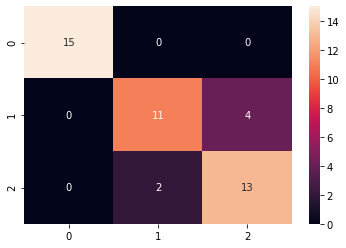

In [228]:
sns.heatmap(metrics.confusion_matrix(y_test, log_model.predict(x_test))   , annot=True )

In [214]:
x_train , x_test , y_train , y_test = train_test_split(cf.drop(columns="target") , cf.target , test_size=0.3 , stratify=cf.target ) 
log_model = LogisticRegression(random_state=0)
log_model.fit(x_train , y_train)
cross_val_score(log_model ,  x_train , y_train , cv=5)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus\anaconda3\lib\site-packages\sk

array([0.95238095, 1.        , 0.95238095, 0.95238095, 0.9047619 ])

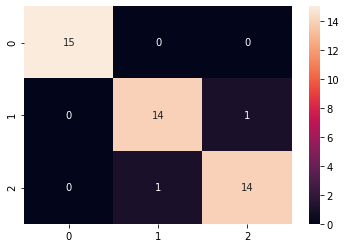

In [215]:
sns.heatmap(metrics.confusion_matrix(y_test, log_model.predict(x_test))   , annot=True )

In [208]:
x_train , x_test , y_train , y_test = train_test_split(cf_std , cf.target , test_size=0.3 , stratify=cf.target ) 
log_model = LogisticRegression(random_state=0)
log_model.fit(x_train , y_train)
cross_val_score(log_model ,  x_train , y_train , cv=5)

array([0.95238095, 1.        , 0.85714286, 0.95238095, 0.95238095])

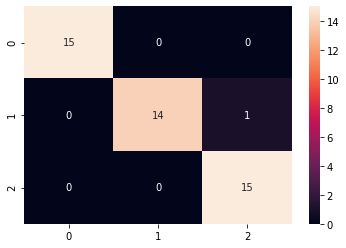

In [213]:
sns.heatmap(metrics.confusion_matrix(y_test, log_model.predict(x_test))   , annot=True )

In [230]:
dir(log_model)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'verbose',
 'w

In [231]:
log_model.classes_

array([0, 1, 2])

In [242]:
log_model.predict_proba(x_test).argmax(axis=1)

array([2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       1], dtype=int64)

In [244]:
log_model.predict(x_test)

array([2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       1])

In [245]:
log_model.intercept_

array([ 1.84342393,  1.10565683, -2.94908076])

In [249]:
log_model.coef_


array([[-1.15190843,  1.36825276, -2.47672287, -2.36157228],
       [ 0.16155646, -1.55158574,  0.5088504 , -0.43542977],
       [ 0.99035196,  0.18333298,  1.96787247,  2.79700205]])

In [250]:
log_model.random_state

0

In [255]:
log_model.multi_class

'auto'

In [3]:
from sklearn.linear_model import Lasso

In [5]:
model = Lasso(alpha=1000)

In [50]:
df = pd.DataFrame( {"A": [1,5,6,6,900,6,6] , "B": [1,2,2,3,3,3,3]})

In [51]:
df

,A,B
0,1,1
1,5,2
2,6,2
3,6,3
4,900,3
5,6,3
6,6,3


In [52]:
model.fit(np.array(df.A).reshape(-1,1) , df.B)

Lasso(alpha=1000)

In [53]:
model.intercept_

2.4285714285714284

In [54]:
df.B.sum()/len(df.B)

2.4285714285714284

In [58]:
np.array(df.A).reshape(-1,1)

array([[  1],
       [  5],
       [  6],
       [  6],
       [900],
       [  6],
       [  6]], dtype=int64)